Task-03

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset
Dataset used-https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [1]:
#importing library
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
#extract zip file
'''
zip_path = 'C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340.zip'
extract_path = 'C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")
'''

'\nzip_path = \'C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340.zip\'\nextract_path = \'C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340\'\n\n# Extract the ZIP file\nwith zipfile.ZipFile(zip_path, \'r\') as zip_ref:\n    zip_ref.extractall(extract_path)\n\nprint("Extraction complete.")\n'

In [3]:
# converting the images to required dataframe
dir='C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340\\PetImages'
animals=['Cat','Dog']
data=[]
 
for animal in animals:
    path=os.path.join(dir,animal) 
    label=animals.index(animal)
    i=0
    for img in os.listdir(path):
        print('i:',i)
        i+=1
        img_path=os.path.join(path,img)
        animal_img=cv2.imread(img_path,0)
        try:
            animal_img=cv2.resize(animal_img,(64,64))
            image=np.array(animal_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass   

"# converting the images to required dataframe\ndir='C:\\Users\\Shaurya\\Downloads\\kagglecatsanddogs_5340\\PetImages'\nanimals=['Cat','Dog']\ndata=[]\n \nfor animal in animals:\n    path=os.path.join(dir,animal) \n    label=animals.index(animal)\n    i=0\n    for img in os.listdir(path):\n        print('i:',i)\n        i+=1\n        img_path=os.path.join(path,img)\n        animal_img=cv2.imread(img_path,0)\n        try:\n            animal_img=cv2.resize(animal_img,(64,64))\n            image=np.array(animal_img).flatten()\n            data.append([image,label])\n        except Exception as e:\n            pass   \n"

In [4]:
#breaking the data into features and labels
features=[]
labels=[]
for feature,label in data:
    features.append(feature)
    labels.append(label)
features=np.array(features)
labels=np.array(labels)
#converting the features and labels into dataframe
df=pd.DataFrame(features)
df['label']=labels
df



"#breaking the data into features and labels\nfeatures=[]\nlabels=[]\nfor feature,label in data:\n    features.append(feature)\n    labels.append(label)\nfeatures=np.array(features)\nlabels=np.array(labels)\n#converting the features and labels into dataframe\ndf=pd.DataFrame(features)\ndf['label']=labels\ndf\n"

In [5]:
#storing df as csv file
df.to_csv('Dataframe.csv',index=False)


"#storing df as csv file\ndf.to_csv('Dataframe.csv',index=False)\n"

In [6]:
df_orig=pd.read_csv('Dataframe.csv')
df=pd.concat([df_orig[:4000],df_orig[12500:16501]])
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,170,176,183,188,192,196,199,202,204,208,...,8,4,3,3,2,2,2,2,2,0
1,43,43,35,41,37,44,44,35,40,34,...,64,39,37,56,58,53,70,63,31,0
2,44,45,47,56,57,52,57,50,52,46,...,79,98,142,161,140,137,153,170,158,0
3,222,222,230,225,230,228,225,225,230,227,...,240,234,227,212,205,205,220,214,213,0
4,112,122,77,92,133,166,127,195,211,226,...,96,103,95,89,90,94,106,93,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,220,220,219,186,233,205,239,239,239,236,...,218,218,60,62,69,61,58,69,66,1
16497,119,108,91,74,75,0,0,0,2,28,...,29,28,35,23,31,28,27,28,99,1
16498,142,145,133,73,60,59,64,59,59,56,...,110,95,110,103,109,86,102,101,93,1
16499,32,42,37,48,48,44,40,39,46,38,...,50,41,43,38,42,39,38,32,25,1


In [7]:
# creating testing and training data
X=df.drop('label',axis=1)
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=4)

In [8]:
#checking the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(6400, 4096)
(1601, 4096)
(6400,)
(1601,)


749      0
15111    1
15704    1
13688    1
13500    1
        ..
15845    1
2227     0
12523    1
1372     0
3551     0
Name: label, Length: 1601, dtype: int64

In [9]:
# creating SVM model
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy=model.score(X_test,y_test)
print('Accuracy: ',accuracy)

In [ ]:
'''# creating SVM model
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy=model.score(X_test,y_test)
print('Accuracy: ',accuracy)'''

"# creating SVM model\nmodel=SVC(C=1,kernel='poly',gamma='auto')\nmodel.fit(X_train,y_train)\nprediction=model.predict(X_test)\naccuracy=model.score(X_test,y_test)\nprint('Accuracy: ',accuracy)"

Prediction for 1st image: Cat
Actual 1st image: Cat


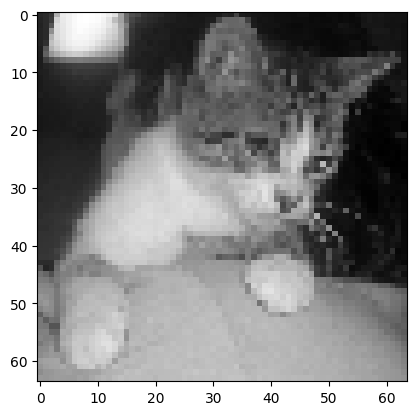

In [ ]:
animals=['Cat','Dog']
print("Prediction for 1st image:",animals[prediction[0]])
actual=animals[y_test.iloc[0]]
print("Actual 1st image:",actual)
#plotting the image
plt.imshow(X_test.iloc[0].values.reshape(64,64),cmap='gray')
plt.show()


In [ ]:
''''#plotting the actual image
given_features=X_test.iloc[0].values             
#equating the given features to find the index of the image
for i in range(len(features)):
    if np.array_equal(features[i],given_features):
        index=i
        break
actual_img_path=os.path.join(dir,animals[labels[index]])
actual_img=cv2.imread(actual_img_path,0)
plt.imshow(actual_img,cmap='gray')
plt.show()'''
    

"'#plotting the actual image\ngiven_features=X_test.iloc[0].values             \n#equating the given features to find the index of the image\nfor i in range(len(features)):\n    if np.array_equal(features[i],given_features):\n        index=i\n        break\nactual_img_path=os.path.join(dir,animals[labels[index]])\nactual_img=cv2.imread(actual_img_path,0)\nplt.imshow(actual_img,cmap='gray')\nplt.show()"